# Step 1: Reading & Understanding the Data

In [389]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [390]:
# Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
pd.set_option('max_info_columns', 500)
pd.set_option('max_info_rows', 500)

In [391]:
# Reading the data
CarPrice_Assignment = pd.read_csv("CarPrice_Assignment.csv")

In [392]:
CarPrice_Assignment.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [393]:
CarPrice_Assignment.shape

(205, 26)

In [394]:
CarPrice_Assignment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [395]:
# Checking if there are any rows having all missing values
CarPrice_Assignment.isnull().all(axis=1).sum()

0

In [396]:
# Dropping if there any duplicates
CarPrice_Assignment.drop_duplicates()
CarPrice_Assignment.shape # Confirmed that there are no duplicates

(205, 26)

In [397]:
CarPrice_Assignment.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [398]:
CarPrice_Assignment.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [399]:
# We have to consider Only 'Car' from column 'CarName' in the model
CarPrice_Assignment['Car'] = CarPrice_Assignment.CarName.apply(lambda x: pd.Series(str(x).split(" ")))[0]
CarPrice_Assignment = CarPrice_Assignment.drop('CarName',axis=1)

In [400]:
CarPrice_Assignment.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Fixing invalid values
 
It is observed that the below car names has spelling mistakes, but correction had an impact and made important variables like horsepower becoming insignficant in RFE. Hence ignoring as it is any way getting eliminated from the model during p-value and VIF selections.

maxda = mazda

Nissan = nissan

porsche = porcshce

toyota = toyouta

vokswagen = volkswagen = vw

# Step 2: Visualizing the Data

<Figure size 720x360 with 0 Axes>

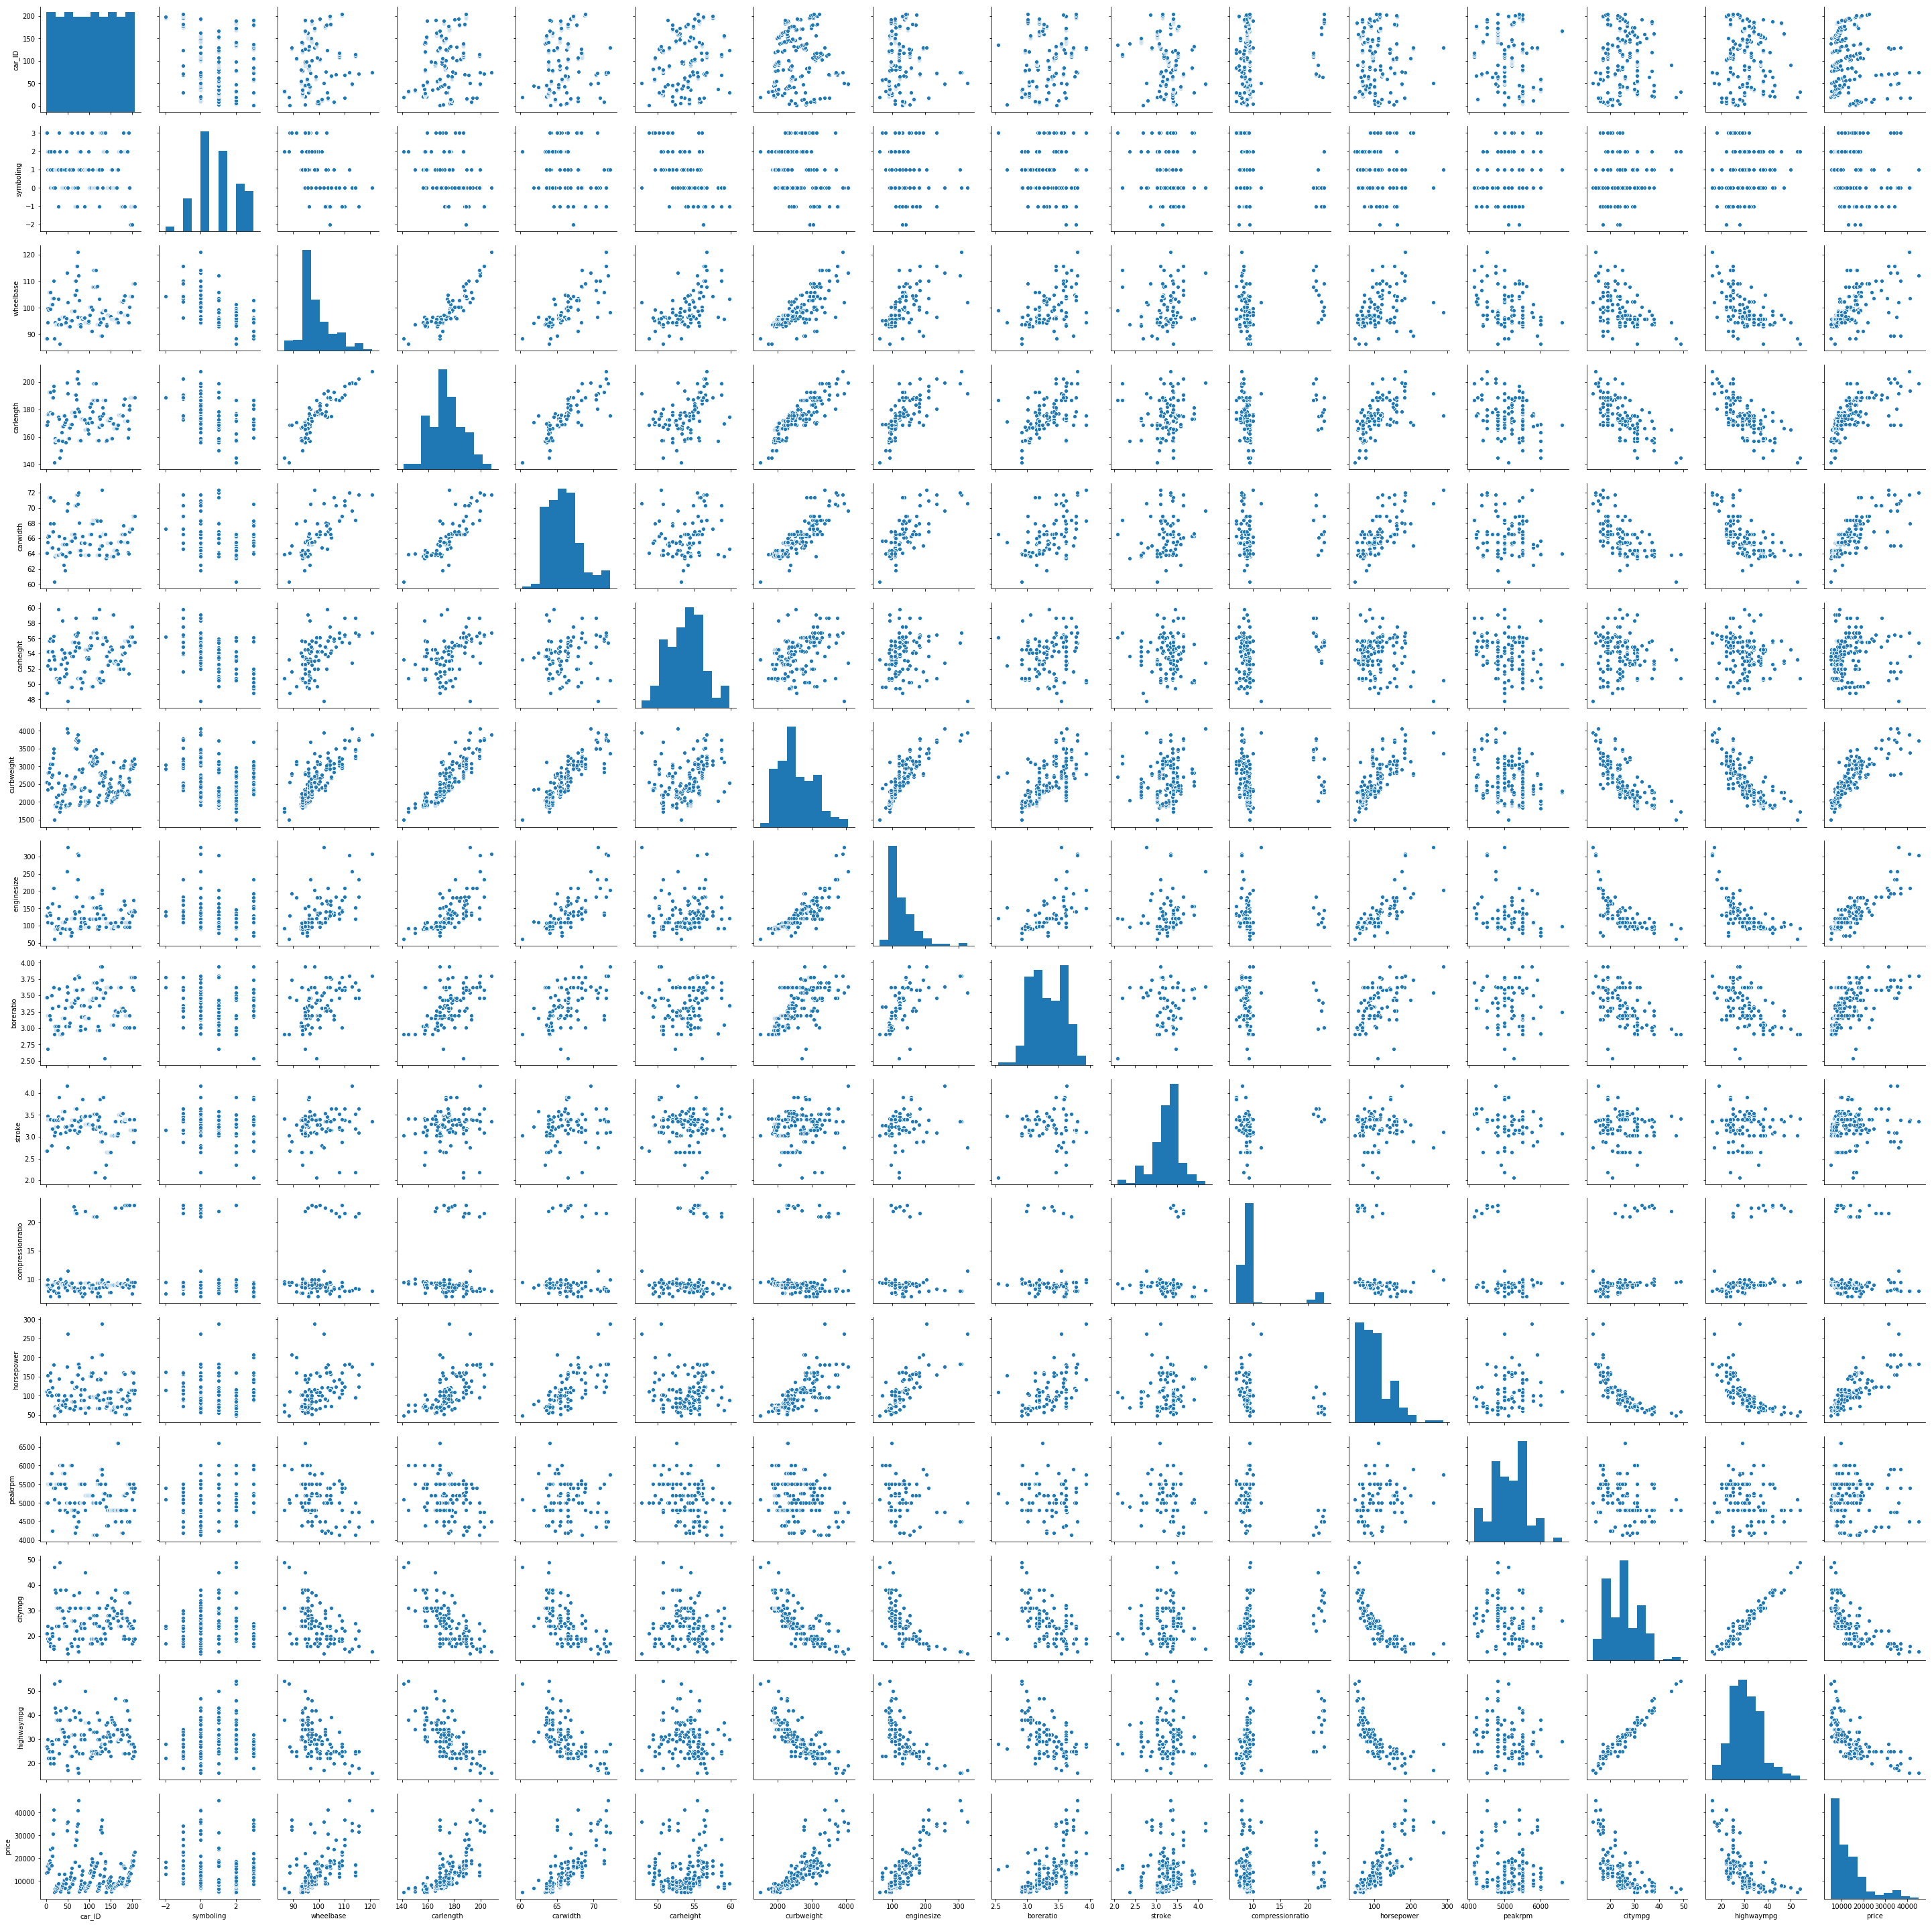

In [353]:
plt.figure(figsize=(10,5))
sns.pairplot(CarPrice_Assignment)
plt.show()

In [354]:
# As there are more variables, splitting the dataset into multiple dataframes for better visualization

list1 = ['car_ID', 'symboling', 'Car', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize']    


list2= ['enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


list3 = ['car_ID', 'symboling', 'Car', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel','fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [355]:
set1 = CarPrice_Assignment.drop(list1,axis=1)
set2 = CarPrice_Assignment.drop(list2,axis=1)
set3 = CarPrice_Assignment.drop(list3,axis=1)

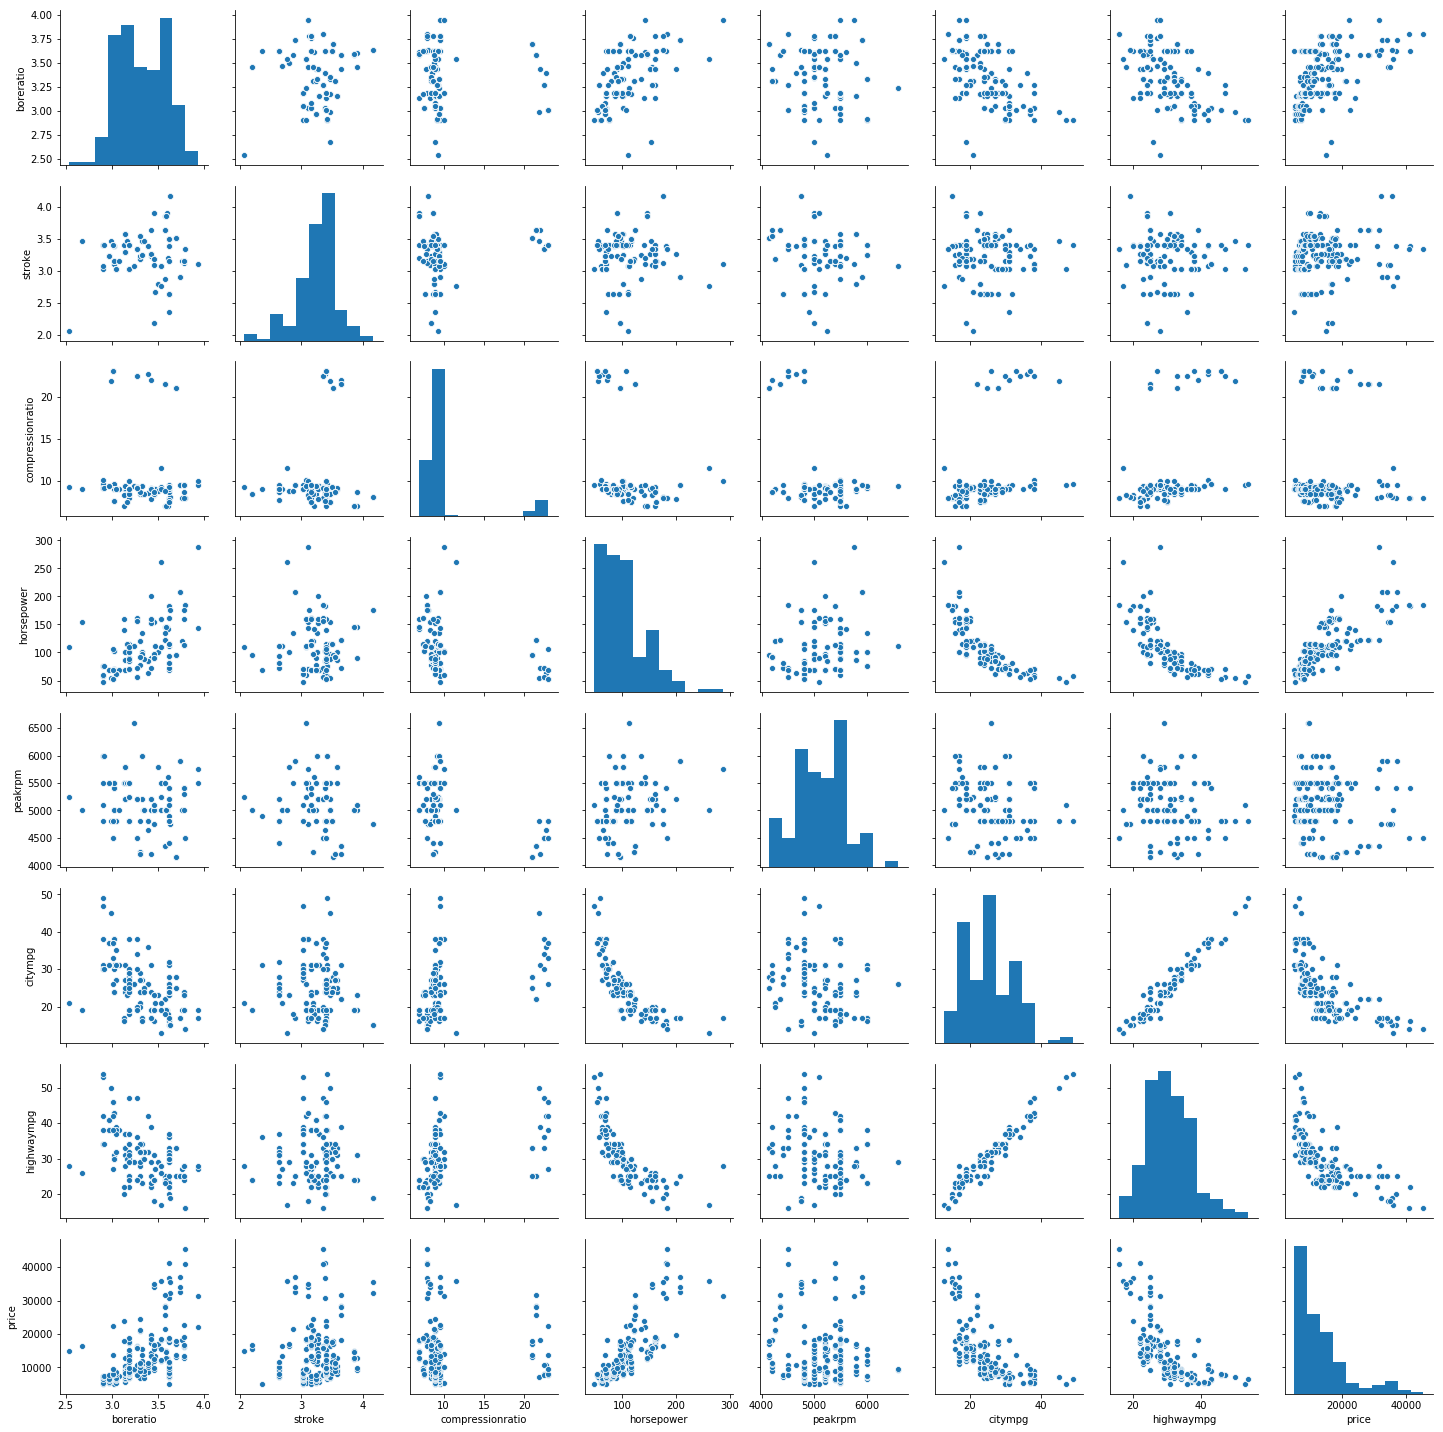

In [356]:
sns.pairplot(set1)
plt.show()

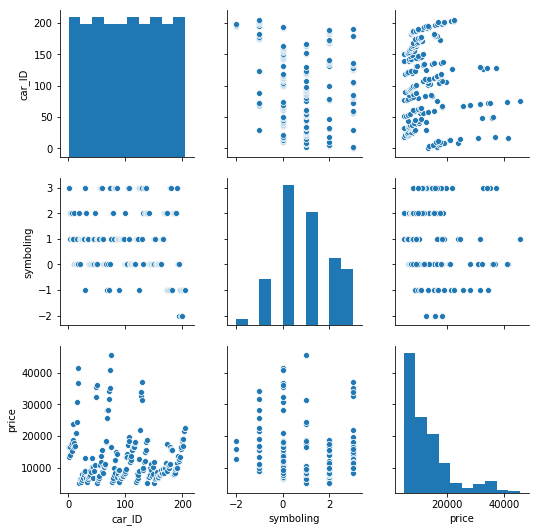

In [357]:
sns.pairplot(set2)
plt.show()

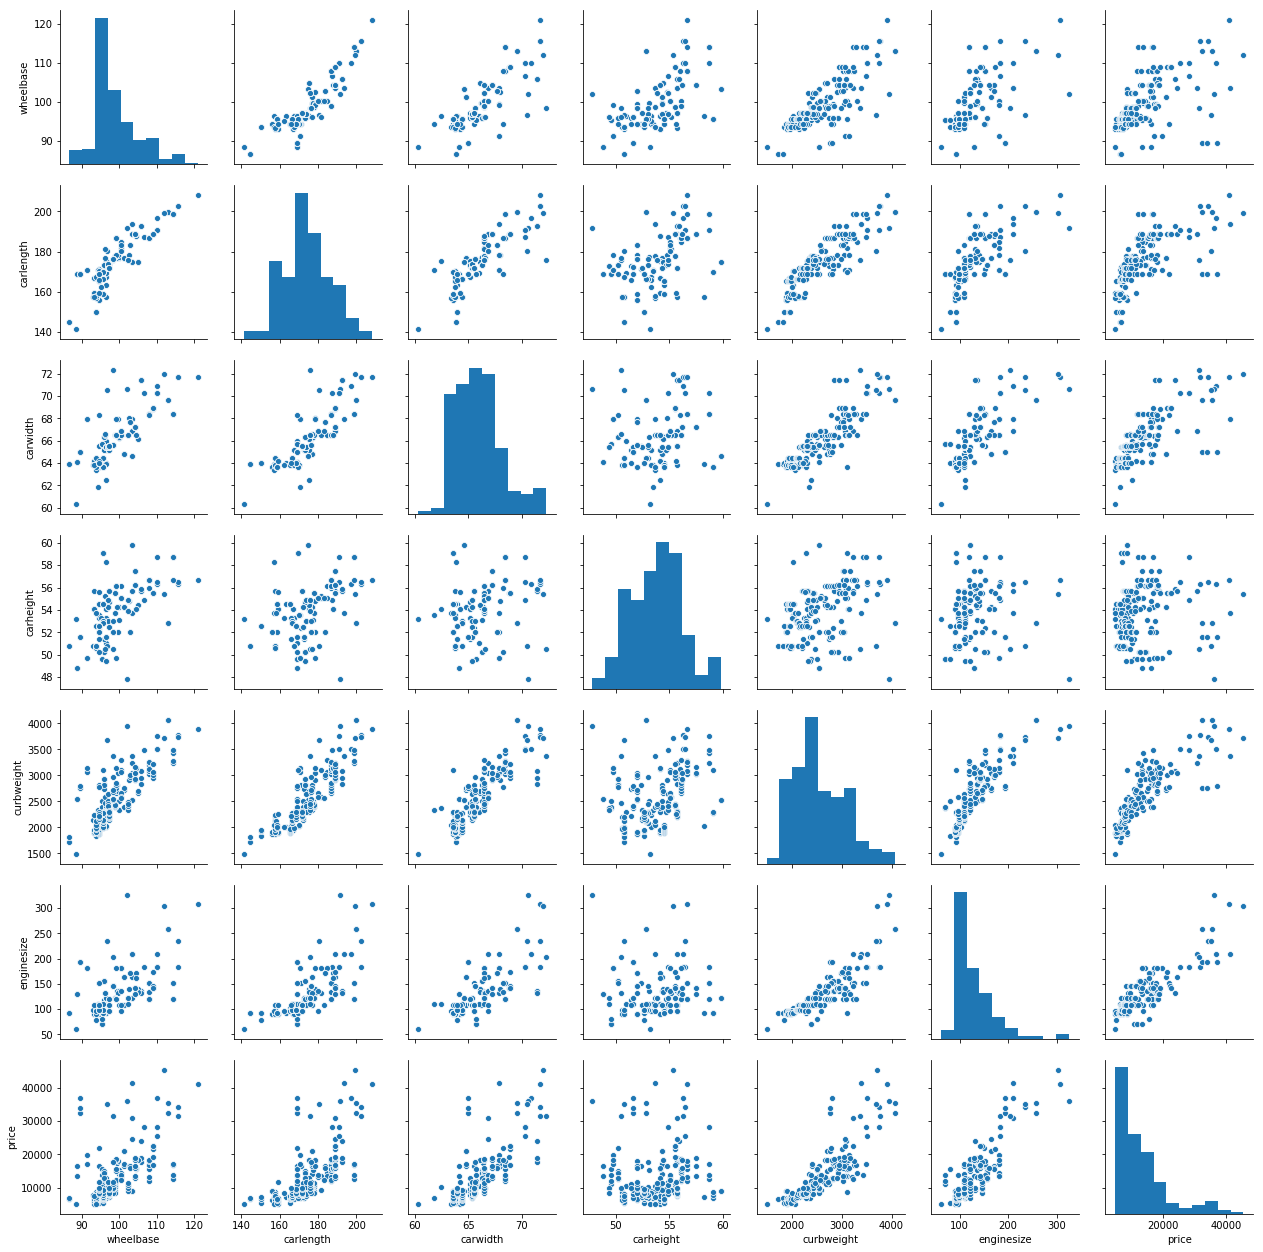

In [358]:
sns.pairplot(set3)
plt.show()

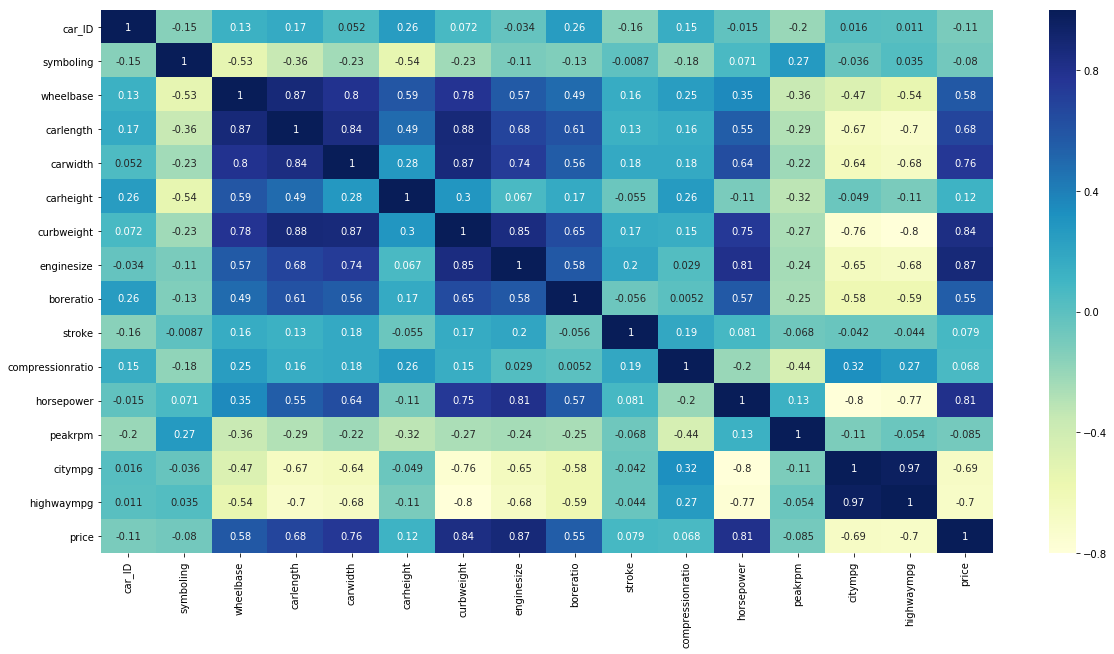

In [359]:
plt.figure(figsize=(20,10))

sns.heatmap(CarPrice_Assignment.corr(),cmap="YlGnBu",annot=True)
plt.show()

### Visualizing the Categorical Variables

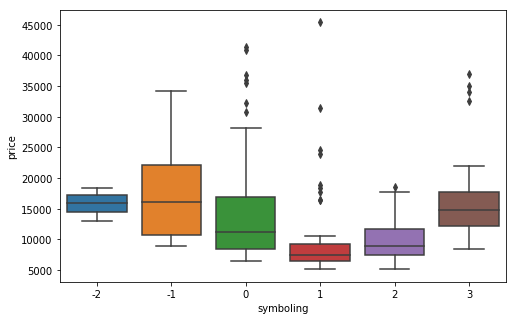

In [360]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = 'symboling', y = 'price', data = CarPrice_Assignment)
plt.show()

### Visualizing the Outliers

In [361]:
# Univariate analysis of Numerical Variables

In [362]:
CarPrice_Assignment.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Car'],
      dtype='object')

In [363]:
CarPrice_Assignment.dtypes

car_ID                int64
symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
Car                  object
dtype: object

In [364]:
num_list = ['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight',
            'enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 
            'peakrpm', 'citympg']

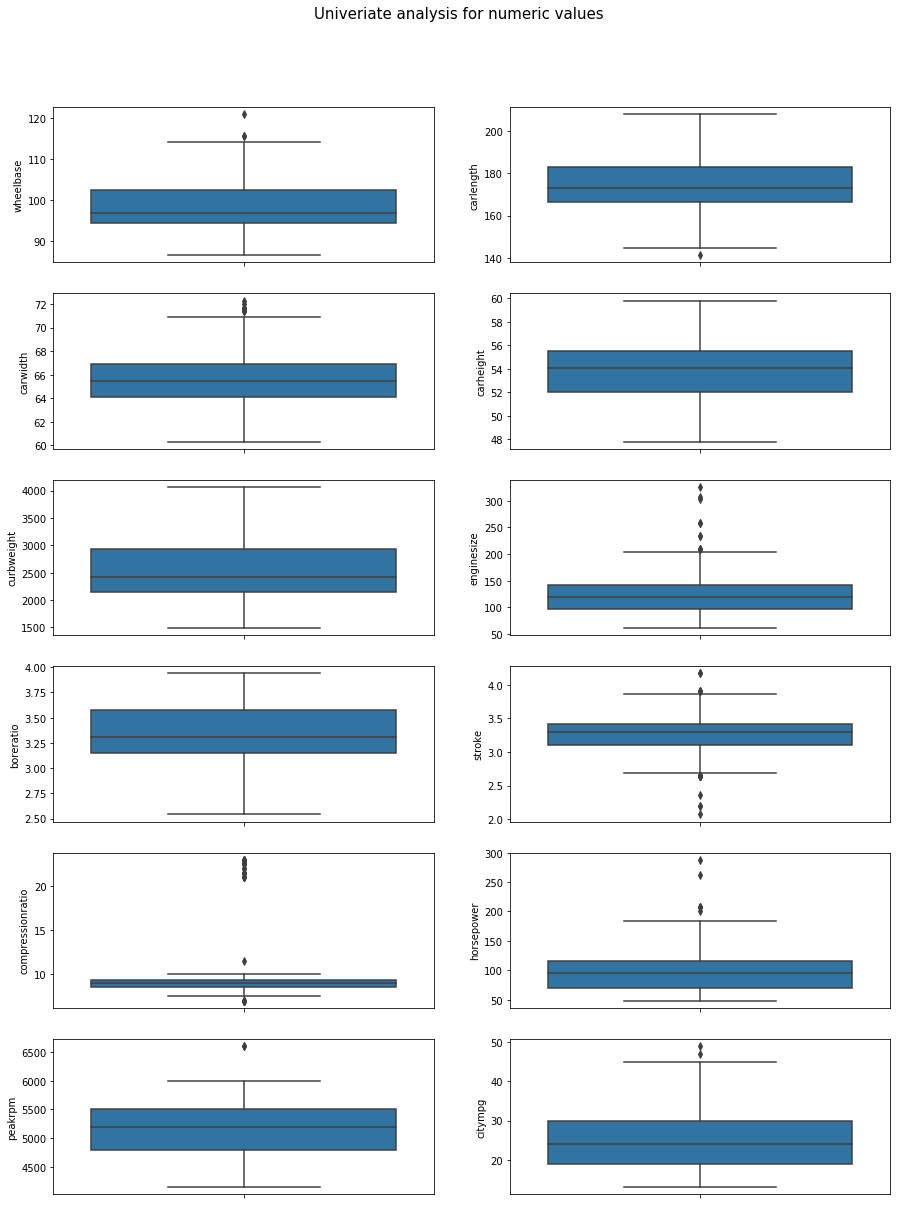

In [365]:
fig, axes = plt.subplots(6,2, figsize= (15,20))
count = 0
for i in CarPrice_Assignment[num_list].columns:
    ax = axes[count//2, count%2]
    sns.boxplot(y = i, data = CarPrice_Assignment, ax = ax)
    count+=1
fig.suptitle('Univeriate analysis for numeric values',fontsize=15,x =0.5, y=0.95)
fig.subplots_adjust(wspace=0.2,hspace=0.2 ) # adjsut spaces between subplots width and height
plt.show()

# Step3: Data Preparation

In [401]:
# Handling Categorical Columns

CarPrice_Assignment['enginelocation']=CarPrice_Assignment['enginelocation'].apply(lambda x: 1 if x=="front" else 0)
CarPrice_Assignment['fueltype']=CarPrice_Assignment['fueltype'].apply(lambda x: 1 if x=="gas" else 0)
CarPrice_Assignment['aspiration']=CarPrice_Assignment['aspiration'].apply(lambda x: 1 if x=="std" else 0)
CarPrice_Assignment['doornumber']=CarPrice_Assignment['doornumber'].apply(lambda x: 1 if x=="two" else 0)
CarPrice_Assignment['cylindernumber']=CarPrice_Assignment['cylindernumber'].apply(lambda x: 4 if x=="four" else
                                                                                            6 if x=="six" else
                                                                                            5 if x=="five" else
                                                                                            3 if x=="three" else
                                                                                           12 if x=="twelve" else
                                                                                            2 if x=="two" else 8)

In [402]:
# Handling Categorical Columns Dummy values

enginetype = pd.get_dummies(CarPrice_Assignment['enginetype'])
fuelsystem = pd.get_dummies(CarPrice_Assignment['fuelsystem'])
carbody = pd.get_dummies(CarPrice_Assignment['carbody'])
drivewheel = pd.get_dummies(CarPrice_Assignment['drivewheel'])
Car = pd.get_dummies(CarPrice_Assignment['Car'])

In [403]:
# As dummy variables must be n-1, dropping the first column from the above variables

enginetype = pd.get_dummies(CarPrice_Assignment['enginetype'],drop_first = True)
fuelsystem = pd.get_dummies(CarPrice_Assignment['fuelsystem'],drop_first = True)
carbody = pd.get_dummies(CarPrice_Assignment['carbody'],drop_first = True)
drivewheel = pd.get_dummies(CarPrice_Assignment['drivewheel'],drop_first = True)
Car = pd.get_dummies(CarPrice_Assignment['Car'],drop_first = True)

In [404]:
# Concating the results to the CarPrice_Assignment Dataframe
CarPrice_Assignment = pd.concat([CarPrice_Assignment,enginetype,fuelsystem,carbody,drivewheel,Car],axis=1)

In [405]:
# Droping Columns as we have created dummies for it
CarPrice_Assignment.drop(['enginetype','fuelsystem','carbody','drivewheel','Car'],axis=1, inplace=True)

In [406]:
CarPrice_Assignment.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,hardtop,hatchback,sedan,wagon,fwd,rwd,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [407]:
CarPrice_Assignment.shape

(205, 67)

# Step 4: Splitting the Data into Train and Test

In [408]:
np.random.seed(0)
df_train, df_test = train_test_split(CarPrice_Assignment, train_size = 0.7, test_size = 0.3, random_state = 100)

In [409]:
print(df_train.shape)
print(df_test.shape)

(143, 67)
(62, 67)


### Rescaling the Features
We will use MixMax scaling

In [410]:
scaler = MinMaxScaler()

In [411]:
train_col_list = df_train.columns

In [412]:
df_train[train_col_list] = scaler.fit_transform(df_train[train_col_list])

In [413]:
df_train.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,hardtop,hatchback,sedan,wagon,fwd,rwd,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000
mean,0.478061,0.559441,0.909091,0.818182,0.440559,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.020979,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.013986,0.076923,0.0,0.062937,0.090909,0.055944,0.027972,0.0,0.020979,0.013986,0.020979,0.076923,0.132867,0.006993,0.0,0.034965,0.041958,0.013986
std,0.289106,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.143818,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.117845,0.267406,0.0,0.243703,0.288490,0.230621,0.165472,0.0,0.143818,0.117845,0.143818,0.267406,0.340624,0.083624,0.0,0.184337,0.201198,0.117845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.232843,0.400000,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.470588,0.600000,1.000000,1.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

### Dividing into X and Y sets for model building

In [414]:
y_train = df_train.pop('price')
X_train = df_train

# Step 5:  Building a linear model



In [415]:
# Balance approach is both Automatic and Manual hence preferring to both with Automatic first
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [416]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', True, 1),
 ('symboling', False, 37),
 ('fueltype', False, 19),
 ('aspiration', False, 15),
 ('doornumber', False, 39),
 ('enginelocation', True, 1),
 ('wheelbase', False, 27),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 17),
 ('horsepower', True, 1),
 ('peakrpm', False, 13),
 ('citympg', False, 32),
 ('highwaympg', False, 16),
 ('dohcv', True, 1),
 ('l', False, 21),
 ('ohc', False, 31),
 ('ohcf', False, 22),
 ('ohcv', False, 38),
 ('rotor', False, 14),
 ('2bbl', False, 34),
 ('4bbl', False, 33),
 ('idi', False, 18),
 ('mfi', False, 42),
 ('mpfi', False, 36),
 ('spdi', False, 40),
 ('spfi', False, 43),
 ('hardtop', False, 28),
 ('hatchback', False, 26),
 ('sedan', False, 29),
 ('wagon', False, 30),
 ('fwd', False, 45),
 ('rwd', False, 35),
 ('alfa-romero', True, 1),
 ('audi', True, 1),
 (

In [417]:
col = X_train.columns[rfe.support_]
col

Index(['car_ID', 'enginelocation', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'dohcv', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'isuzu',
       'jaguar', 'porsche', 'volkswagen'],
      dtype='object')

In [418]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carheight', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'spfi', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dodge', 'honda', 'maxda', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyota', 'toyouta', 'vokswagen', 'volvo', 'vw'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [419]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [420]:
#Adding a constant variable

X_train_rfe =sm.add_constant(X_train_rfe)

In [421]:
lm = sm.OLS(y_train,X_train_rfe).fit() #Running the linear model

In [422]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     96.77
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           5.40e-65
Time:                        11:43:40   Log-Likelihood:                 218.95
No. Observations:                 143   AIC:                            -395.9
Df Residuals:                     122   BIC:                            -333.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4103      0.106      3.

In [423]:
X_train_new = X_train_rfe.drop(['car_ID','carlength','dohcv','alfa-romero','chevrolet','volkswagen'],axis=1)

In [424]:
#Calculate the VIFs for the Model
vif = pd.DataFrame()
X = X_train_new
vif['Features']=X.columns
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,284.77
5,enginesize,49.60
4,cylindernumber,20.20
3,curbweight,10.60
6,boreratio,7.73
2,carwidth,6.58
8,horsepower,4.68
7,stroke,3.57
14,porsche,2.33
13,jaguar,2.30


In [425]:
# Again calculating VIF
X_train_new = X_train_new.drop(['const','enginesize'],axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features']=X.columns
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,44.01
0,enginelocation,40.67
2,curbweight,38.29
4,boreratio,19.31
3,cylindernumber,17.33
5,stroke,16.98
6,horsepower,13.20
12,porsche,1.84
9,buick,1.68
11,jaguar,1.65


In [426]:
# Again calculating VIF
X_train_new = X_train_new.drop(['carwidth'],axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features']=X.columns
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,39.27
1,curbweight,25.75
3,boreratio,18.63
2,cylindernumber,17.19
4,stroke,16.57
5,horsepower,13.20
11,porsche,1.81
10,jaguar,1.63
8,buick,1.59
7,bmw,1.21


In [427]:
# Again calculating VIF
X_train_new = X_train_new.drop(['enginelocation'],axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features']=X.columns
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,24.71
4,horsepower,12.22
2,boreratio,10.81
1,cylindernumber,10.10
3,stroke,6.44
10,porsche,1.55
7,buick,1.48
9,jaguar,1.39
6,bmw,1.18
5,audi,1.16


In [428]:
# Again calculating VIF
X_train_new = X_train_new.drop(['curbweight'],axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features']=X.columns
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cylindernumber,9.97
3,horsepower,8.82
1,boreratio,6.66
2,stroke,6.01
9,porsche,1.38
8,jaguar,1.32
5,bmw,1.18
6,buick,1.17
4,audi,1.13
7,isuzu,1.03


In [429]:
# Again calculating VIF
X_train_new = X_train_new.drop(['cylindernumber'],axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features']=X.columns
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,boreratio,6.61
2,horsepower,6.09
1,stroke,4.81
8,porsche,1.37
7,jaguar,1.27
4,bmw,1.14
3,audi,1.12
5,buick,1.10
6,isuzu,1.02


In [430]:
# Again calculating VIF
X_train_new = X_train_new.drop(['boreratio'],axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features']=X.columns
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,4.46
0,stroke,3.16
7,porsche,1.37
6,jaguar,1.24
3,bmw,1.14
4,buick,1.10
2,audi,1.08
5,isuzu,1.02


In [431]:
X_train_new.columns

Index(['stroke', 'horsepower', 'audi', 'bmw', 'buick', 'isuzu', 'jaguar',
       'porsche'],
      dtype='object')

In [432]:
# Building Linear Model after removing High VIFs
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() #Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     98.35
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.84e-52
Time:                        11:44:01   Log-Likelihood:                 154.76
No. Observations:                 143   AIC:                            -291.5
Df Residuals:                     134   BIC:                            -264.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0029      0.028     -0.105      0.9

In [433]:
X_train_new = X_train_new.drop(['stroke','isuzu'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() #Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     132.6
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.62e-54
Time:                        11:44:02   Log-Likelihood:                 154.54
No. Observations:                 143   AIC:                            -295.1
Df Residuals:                     136   BIC:                            -274.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0126      0.013      0.963      0.3

# Step 6: Residual Analysis of the train Data

In [434]:
X_train_lm.head()

,const,horsepower,audi,bmw,buick,jaguar,porsche
122,1.0,0.083333,0.0,0.0,0.0,0.0,0.0
125,1.0,0.395833,0.0,0.0,0.0,0.0,1.0
166,1.0,0.266667,0.0,0.0,0.0,0.0,0.0
1,1.0,0.262500,0.0,0.0,0.0,0.0,0.0
199,1.0,0.475000,0.0,0.0,0.0,0.0,0.0


In [435]:
y_train_price = lm.predict(X_train_lm)

In [436]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

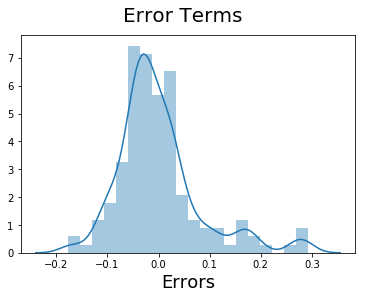

In [437]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

# Step 7: Making Predictions
Applying the scaling on the test sets

In [438]:
test_col_list = df_test.columns

In [439]:
df_test[test_col_list] = scaler.transform(df_test[test_col_list])

In [440]:
# Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [441]:
X_train_new.columns

Index(['horsepower', 'audi', 'bmw', 'buick', 'jaguar', 'porsche'], dtype='object')

In [442]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [443]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [444]:
df_test.shape

(62, 66)

# Step 8: Model Evaluation

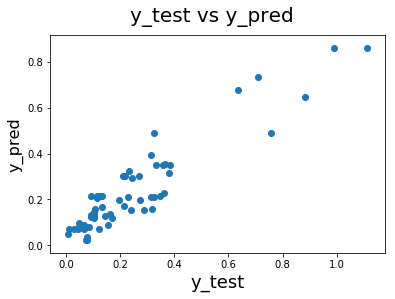

In [445]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [446]:
X_test_lm = sm.add_constant(X_test_new)
lm = sm.OLS(y_test,X_test_lm).fit() #Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     91.74
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.07e-25
Time:                        11:46:29   Log-Likelihood:                 71.592
No. Observations:                  62   AIC:                            -131.2
Df Residuals:                      56   BIC:                            -118.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0042      0.020     -0.214      0.8

In [447]:
X_test_new = X_test_new.drop('jaguar',axis=1)

X_test_lm = sm.add_constant(X_test_new)
lm = sm.OLS(y_test,X_test_lm).fit() #Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     91.74
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.07e-25
Time:                        11:46:30   Log-Likelihood:                 71.592
No. Observations:                  62   AIC:                            -131.2
Df Residuals:                      56   BIC:                            -118.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0042      0.020     -0.214      0.8

### Results between Train Vs Test Data sets

`Train R-Squared = 0.854`
`Train Adjusted R-Squared = 0.848`

`Test R-Squared = 0.891`
`Test Adjusted R-Squared = 0.881`

# Manual Approach 

To verify the RFE Approach

horsepower is noticed that it is highly correlated to 'price' the most.Let's see a pairplot for `horsepower` vs `price`.

In [448]:
np.random.seed(0)
df_train, df_test = train_test_split(CarPrice_Assignment, train_size = 0.7, test_size = 0.3, random_state = 100)

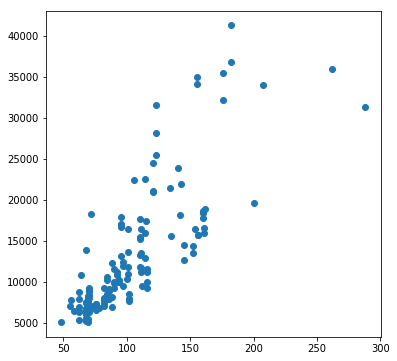

In [449]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.horsepower, df_train.price)
plt.show()

### Dividing into X and Y sets for the model building

In [450]:
y_train = df_train.pop('price')
X_train = df_train

### Building a linear model

In [451]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['horsepower']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [452]:
lr.params

const        -3192.650565
horsepower     158.445735
dtype: float64

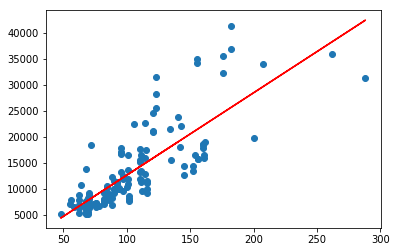

In [453]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], (-3192.650565) + (158.445735)*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [454]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           6.04e-34
Time:                        11:47:02   Log-Likelihood:                -1409.0
No. Observations:                 143   AIC:                             2822.
Df Residuals:                     141   BIC:                             2828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3192.6506   1076.508     -2.966      0.0

In [455]:
### Adding another variables

In [456]:
# Assign all the feature variables to X
X_train_lm = X_train[['horsepower','audi','bmw','porsche','buick']]

In [457]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         -1613.777903
horsepower      132.239837
audi           3248.152033
bmw           10242.180429
porsche        2639.605950
buick         14583.608070
dtype: float64

In [458]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     121.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.44e-48
Time:                        11:47:05   Log-Likelihood:                -1363.1
No. Observations:                 143   AIC:                             2738.
Df Residuals:                     137   BIC:                             2756.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1613.7779    858.501     -1.880      0.0

### Results between Automatic (RFE) and Manual Approach

`Train R-Squared = 0.854`
`Train Adjusted R-Squared = 0.848`

`Test R-Squared = 0.891`
`Test Adjusted R-Squared = 0.881`

Manual Method

`R-Squared = 0.816`
`Adjusted R-Squared = 0.809`

From the Regression Analysis, it is clear that below 2 variables are contibuting a variance of 80% to the model

`1. horsepower`

`2.Car Brands`
    audi, bmw, buick, jaguar, porsche

`This is indicating that Geely Automobile Company need to focus primarily on the brand and horsepower to give comptetion to their US and European counterparts`